# ***Cause of Deaths in the United States (1999–2016)***

## Today we are going to analysis the dataset of deaths occured in "United states" from 1996 - 2016.

In [1]:
import pandas as pd

### Data is gathered from Kaggle, the link is [Death data set](https://www.kaggle.com/nandhinibaskar/national-center-for-health-statistics)

In [3]:
#Kindly, remove these 2 two lines, if you are running this code out of  Google colabs.
from google.colab import files
uploaded = files.upload()

Saving nchs.csv to nchs (1).csv


## Data  Analysis and Cleaning
### Let's first see the data preview

In [5]:
data = pd.read_csv("nchs.csv")
data.head(5)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


### Lets check the total Number of Rows and Columns

In [6]:
data.shape 

(10296, 6)

### Clear the "na" values

In [7]:
data = data.dropna()
data.shape

(10296, 6)

### Let's Check for different causes

In [9]:
causes = data["Cause Name"].unique()
causes

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Cancer', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'],
      dtype=object)

### Here we have cause called as "All Causes", So lets remove it.

In [13]:
data = data[data["Cause Name"] != "All causes"]
causes = data["Cause Name"].unique()
causes

array(['Unintentional injuries', "Alzheimer's disease", 'Cancer', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia',
       'Kidney disease', 'Stroke', 'Suicide'], dtype=object)

In [14]:
len(causes)

10

#### We have 10 different causes 

### Let's Check for different states

In [15]:
state = data["State"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype=object)

### Here we have cause called as "United States", So lets remove it.

In [18]:
data1 = data[data["State"] !="United States"]
state = data1["State"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [19]:
len(state)

51

#### We have 51 different states

In [23]:
d = data["Year"].unique()
d

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999])

### Let's group out the summation of deaths by year

In [24]:
dyear = data.groupby("Year").sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,3811652,36290.4
2000,3804388,35849.3
2001,3798716,35256.0
2002,3837746,35101.3
2003,3824230,34504.9
2004,3728266,33029.7
2005,3779962,32947.6
2006,3709352,31757.6
2007,3692602,31046.7


## Data  Visualization

### Divide the deaths in two halves for good analysis of visualization

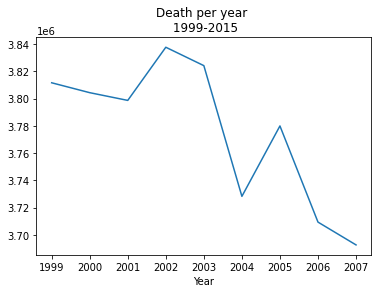

In [29]:
dyear["Deaths"].head(9).plot(title="Death per year \n 1999-2007") 

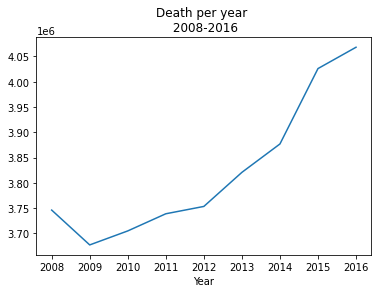

In [30]:
dyear["Deaths"].tail(9).plot(title="Death per year \n 2008-2016") 

In [26]:
dataset2 = data1.groupby("State").sum()
dataset2.sort_values("Deaths", ascending=False , inplace = True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,361350,3387500,9902.4
Florida,361350,2381013,9934.1
Texas,361350,2223113,10970.2
New York,361350,2147657,10052.8
Pennsylvania,361350,1755797,11074.3
Ohio,361350,1513814,11729.3
Illinois,361350,1427335,10846.4
Michigan,361350,1239287,11468.1
North Carolina,361350,1048219,11408.7


### Top ten states with highest death number range from 1999-2015

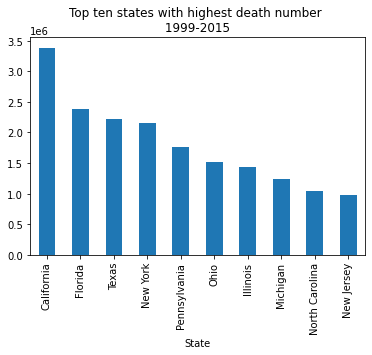

In [27]:
dataset2["Deaths"].head(10).plot.bar(title= "Top ten states with highest death number \n 1999-2016 ")

In [32]:
dataset3 = data.groupby("Cause Name").sum()
dataset3.sort_values("Deaths", ascending=False , inplace = True)
dataset3.head(10)

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Heart disease,1879020,23150366,186996.3
Cancer,1879020,20489072,168385.3
Stroke,1879020,5160280,43391.4
CLRD,1879020,4869452,41787.4
Unintentional injuries,1879020,4355768,40086.7
Alzheimer's disease,1879020,2746824,23043.1
Diabetes,1879020,2632758,21969.7
Influenza and pneumonia,1879020,2077938,17212.2
Kidney disease,1879020,1615960,13234.5


### Top ten causes of death in USA range from 1999-2015

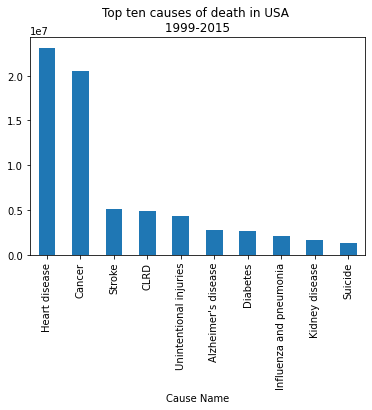

In [33]:
dataset3["Deaths"].head(10).plot.bar(title="Top ten causes of death in USA \n 1999-2016 ")

## ***Finally, this analysis and vizulisation is very helpful for the development and production of the medicines to save the patients. Thank you*** 